In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

In [3]:
from effort2.rates.BtoV import BtoV
from effort2.formfactors.formFactorBtoC import BToDStarCLN, BToDStarBGL

In [4]:
bToDStarCLN = BToDStarCLN(
    m_B=5.27963, 
    m_M=2.01026, 
    h_A1_1=0.906,
    rho2=1.03, 
    R1_1=1.38, 
    R2_1=0.97
)

In [5]:
# Florian
vcb = 41.6558e-3
eta_ew = 1.0066
a = np.array([3.79139e-04, 2.69537e-02]) / vcb / eta_ew
b = np.array([5.49846e-04, -2.04028e-03]) / vcb / eta_ew
c = np.array([-4.32818e-04, 5.35029e-03]) / vcb / eta_ew
del vcb
del eta_ew

# # Grinstein
# vcb = 41.9e-3
# eta_ew = 1.0066
# a = np.array([-0.039e-2, -2.77e-2]) / vcb / eta_ew
# b = np.array([0.056e-2, -0.22e-2]) / vcb / eta_ew
# c = np.array([-0.046e-2, 0.59e-2]) / vcb / eta_ew
# del vcb
# del eta_ew

bToDStarBGL = BToDStarBGL(
    m_B=5.27963,
    m_M=2.01026,
    exp_coeff_a = a,
    exp_coeff_b = b,
    exp_coeff_c = c,
)

In [6]:
rate_cln = BtoV(bToDStarCLN, 40e-3, bToDStarCLN.m_B, bToDStarCLN.m_M) 
rate_bgl = BtoV(bToDStarBGL, 40e-3, bToDStarBGL.m_B, bToDStarBGL.m_M) 

In [12]:
%%time
# Look at this execution time, no caches implemented! This is why you should use the new version
rate_cln.Gamma()

CPU times: user 9.04 ms, sys: 294 µs, total: 9.33 ms
Wall time: 8.87 ms


2.293745821226628e-14

In [13]:
%%time
# Look at this execution time, no caches implemented! This is why you should use the new version
rate_bgl.Gamma()

CPU times: user 69.5 ms, sys: 3.06 ms, total: 72.6 ms
Wall time: 69.1 ms


1.894725894392938e-14

In [14]:
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [15]:
w = np.linspace(rate_cln.w_min, rate_cln.w_max)

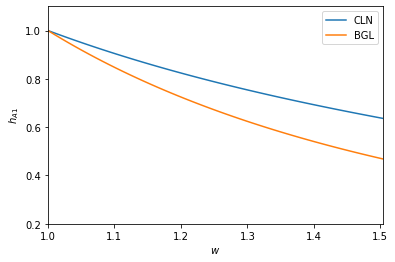

In [16]:
plt.plot(w, [bToDStarCLN.h_A1(x) / bToDStarCLN.h_A1(1) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.h_A1(x) / bToDStarBGL.h_A1(1) for x in w], label="BGL")
plt.xlim(min(w), max(w))
plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$h_{A1}$")
plt.legend()
plt.show()
plt.close()

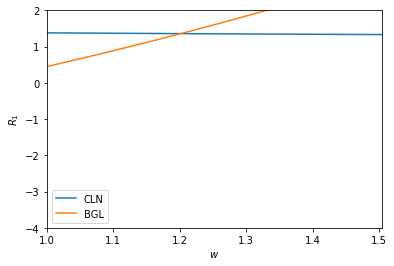

In [17]:
plt.plot(w, [bToDStarCLN.R1(x) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.R1(x) for x in w], label="BGL")
plt.xlim(min(w), max(w))
plt.ylim(-4, 2)
plt.xlabel("$w$")
plt.ylabel("$R_1$")
plt.legend()
plt.show()
plt.close()

/home/mapr/projects/eFFORT2/effort2/formfactors/formFactorBtoC.py:234: RuntimeWarning: invalid value encountered in double_scalars
  return (w - self.r) / (w - 1) - self.F1(z) / self.m_B / (w - 1) / self.f(z)


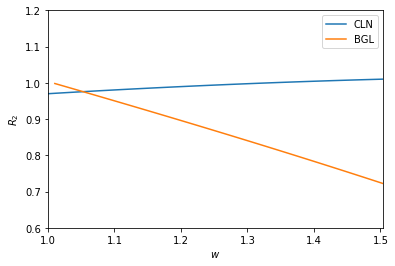

In [18]:
plt.plot(w, [bToDStarCLN.R2(x) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.R2(x) for x in w], label="BGL")
plt.xlim(min(w), max(w))
plt.ylim(0.6, 1.2)
plt.xlabel("$w$")
plt.ylabel("$R_2$")
plt.legend()
plt.show()
plt.close()

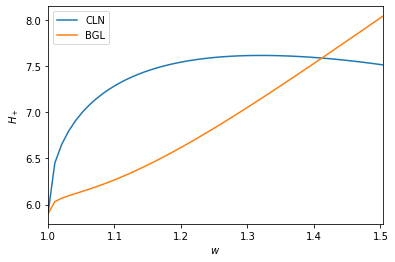

In [19]:
plt.plot(w, [bToDStarCLN.Hplus(x) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.Hplus(x) for x in w], label="BGL")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_+$")
plt.legend()
plt.show()
plt.close()

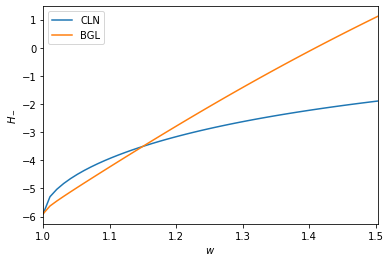

In [20]:
plt.plot(w, [bToDStarCLN.Hminus(x) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.Hminus(x) for x in w], label="BGL")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_-$")
plt.legend()
plt.show()
plt.close()

/home/mapr/projects/eFFORT2/effort2/formfactors/formFactorBtoC.py:234: RuntimeWarning: invalid value encountered in double_scalars
  return (w - self.r) / (w - 1) - self.F1(z) / self.m_B / (w - 1) / self.f(z)


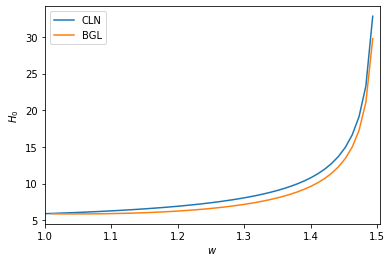

In [21]:
plt.plot(w, [bToDStarCLN.Hzero(x) for x in w], label="CLN")
plt.plot(w, [bToDStarBGL.Hzero(x) for x in w], label="BGL")
plt.xlim(min(w), max(w))
#plt.ylim(0.2, 1.1)
plt.xlabel("$w$")
plt.ylabel("$H_0$")
plt.legend()
plt.show()
plt.close()

The error thrown here happens when you evaluate at the exact boundary of the w range. It can be neglected or you add/subtract epsilon to the defined boundaries w_min and w_max (see documentation).

/home/mapr/projects/eFFORT2/effort2/formfactors/formFactorBtoC.py:234: RuntimeWarning: invalid value encountered in double_scalars
  return (w - self.r) / (w - 1) - self.F1(z) / self.m_B / (w - 1) / self.f(z)


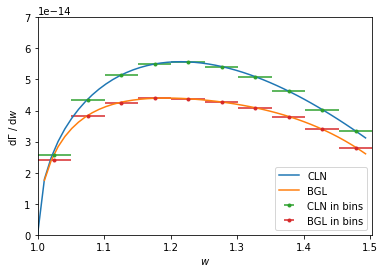

In [22]:
w = np.linspace(rate_cln.w_min, rate_cln.w_max)
wbins = np.linspace(rate_cln.w_min, rate_cln.w_max, num=11)

plt.plot(w, [rate_cln.dGamma_dw(x) for x in w], label="CLN")
plt.plot(w, [rate_bgl.dGamma_dw(x) for x in w], label="BGL")
plt.errorbar(wbins[:-1] + (wbins[1] - wbins[0]) / 2, [rate_cln.DGamma_Dw(l, u)/ (u-l) for (l, u) in zip(wbins, wbins[1:])], marker='.', xerr=(wbins[1] - wbins[0]) / 2, ls='', label="CLN in bins")
plt.errorbar(wbins[:-1] + (wbins[1] - wbins[0]) / 2, [rate_bgl.DGamma_Dw(l, u)/ (u-l) for (l, u) in zip(wbins, wbins[1:])], marker='.', xerr=(wbins[1] - wbins[0]) / 2, ls='', label="BGL in bins")
plt.xlim(min(w), max(w))
plt.ylim(0, 7e-14)
plt.xlabel("$w$")
plt.ylabel("d$\Gamma$ / d$w$")
plt.legend()
plt.show()
plt.close()

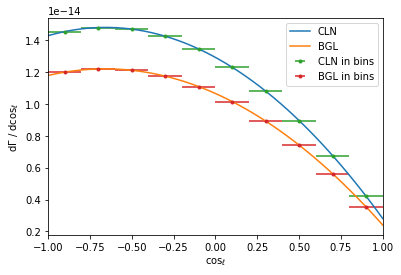

In [23]:
cosL = np.linspace(rate_cln.cosL_min, rate_cln.cosL_max)
cosLbins = np.linspace(rate_cln.cosL_min, rate_cln.cosL_max, num=11)

plt.plot(cosL, [rate_cln.dGamma_dcosL(x) for x in cosL], label="CLN")
plt.plot(cosL, [rate_bgl.dGamma_dcosL(x) for x in cosL], label="BGL")
plt.errorbar(cosLbins[:-1] + (cosLbins[1] - cosLbins[0]) / 2, [rate_cln.DGamma_DcosL(l, u)/ (u-l) for (l, u) in zip(cosLbins, cosLbins[1:])], marker='.', xerr=(cosLbins[1] - cosLbins[0]) / 2, ls='', label="CLN in bins")
plt.errorbar(cosLbins[:-1] + (cosLbins[1] - cosLbins[0]) / 2, [rate_bgl.DGamma_DcosL(l, u)/ (u-l) for (l, u) in zip(cosLbins, cosLbins[1:])], marker='.', xerr=(cosLbins[1] - cosLbins[0]) / 2, ls='', label="BGL in bins")
plt.xlim(min(cosL), max(cosL))
#plt.ylim(0, 4e-14)
plt.xlabel("$\cos_\ell$")
plt.ylabel("d$\Gamma$ / d$\cos_\ell$")
plt.legend()
plt.show()
plt.close()

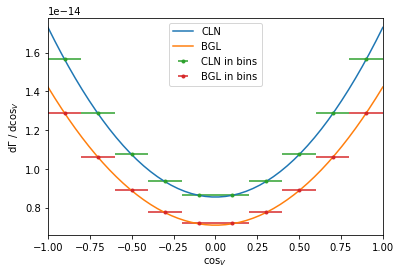

In [24]:
cosV = np.linspace(rate_cln.cosV_min, rate_cln.cosV_max)
cosVbins = np.linspace(rate_cln.cosV_min, rate_cln.cosV_max, num=11)

plt.plot(cosV, [rate_cln.dGamma_dcosV(x) for x in cosV], label="CLN")
plt.plot(cosV, [rate_bgl.dGamma_dcosV(x) for x in cosV], label="BGL")
plt.errorbar(cosVbins[:-1] + (cosVbins[1] - cosVbins[0]) / 2, [rate_cln.DGamma_DcosV(l, u)/ (u-l) for (l, u) in zip(cosVbins, cosVbins[1:])], marker='.', xerr=(cosVbins[1] - cosVbins[0]) / 2, ls='', label="CLN in bins")
plt.errorbar(cosVbins[:-1] + (cosVbins[1] - cosVbins[0]) / 2, [rate_bgl.DGamma_DcosV(l, u)/ (u-l) for (l, u) in zip(cosVbins, cosVbins[1:])], marker='.', xerr=(cosVbins[1] - cosVbins[0]) / 2, ls='', label="BGL in bins")
plt.xlim(min(cosV), max(cosV))
#plt.ylim(0, 4e-14)
plt.xlabel("$\cos_V$")
plt.ylabel("d$\Gamma$ / d$\cos_V$")
plt.legend()
plt.show()
plt.close()

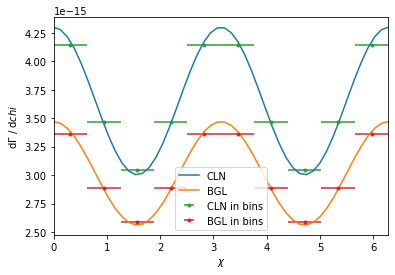

In [25]:
chi = np.linspace(rate_cln.chi_min, rate_cln.chi_max)
chibins = np.linspace(rate_cln.chi_min, rate_cln.chi_max, num=11)

plt.plot(chi, [rate_cln.dGamma_dchi(x) for x in chi], label="CLN")
plt.plot(chi, [rate_bgl.dGamma_dchi(x) for x in chi], label="BGL")
plt.errorbar(chibins[:-1] + (chibins[1] - chibins[0]) / 2, [rate_cln.DGamma_Dchi(l, u)/ (u-l) for (l, u) in zip(chibins, chibins[1:])], marker='.', xerr=(chibins[1] - chibins[0]) / 2, ls='', label="CLN in bins")
plt.errorbar(chibins[:-1] + (chibins[1] - chibins[0]) / 2, [rate_bgl.DGamma_Dchi(l, u)/ (u-l) for (l, u) in zip(chibins, chibins[1:])], marker='.', xerr=(chibins[1] - chibins[0]) / 2, ls='', label="BGL in bins")
plt.xlim(min(chi), max(chi))
#plt.ylim(0, 1e-14)
plt.xlabel("$\chi$")
plt.ylabel("d$\Gamma$ / d$chi$")
plt.legend()
plt.show()
plt.close()